## 프로젝트 기반 빅데이터 서비스 솔루션 개발 전문과정

### 교과목명 : 통계
- 평가일 : 22.2.4
- 성명 : 권혁종
- 점수 : 94.5

Q1. df에서 mathematics 점수의 평균값, 중앙값, 최빈값, 분산, 표준편차, 범위, IQR을 구하세요. 5

In [64]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [65]:
math = df.mathematics
print('평균값 :',math.mean(),'\n')
print('중앙값 :',math.median(),'\n')
print('최빈값 :',math.mode(),'\n')
print('분산 :',math.var(),'\n')
print('표준편차 :',math.std(),'\n')
print('범위 :',math.max()-math.min(),'\n')
print('IQR :',np.percentile(math,75)-np.percentile(math,25),'\n')

평균값 : 78.88 

중앙값 : 80.0 

최빈값 : 0    77
1    82
2    84
dtype: int64 

분산 : 70.80163265306118 

표준편차 : 8.414370603500965 

범위 : 37 

IQR : 8.0 



Q2. df.english를 표준화한 후 배열로 변환하여 처음 5개 원소를 출력하세요.5

In [66]:
english_z = (df.english-df.english.mean())/df.english.std()
english_z.head()

student number
1   -1.671461
2    1.083694
3   -0.242862
4   -1.773503
5   -0.140819
Name: english, dtype: float64

In [67]:
score = df.english
type(score)

pandas.core.series.Series

Q3. score에 대하여 다음사항을 수행하세요. 5
- 상자그림으로 시각화하여 이상치 여부를 탐색
- 이상치 값 및 인덱스 출력
- 이상치 삭제
- 상자그림으로 시각화하여 이상치 제거 여부 재확인.

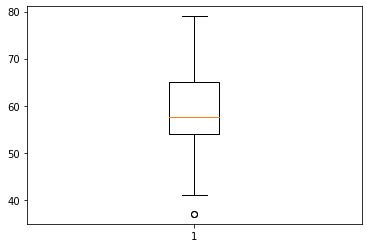

In [68]:
import matplotlib.pyplot as plt
plt.boxplot(score)
plt.show()
# 이상치는 아래에 1개 존재

In [69]:
score.describe()
IQR = np.percentile(score,75)-np.percentile(score,25)
lh = np.percentile(score,25)-1.5*IQR
score[score<lh]

student number
20    37
35    37
Name: english, dtype: int64

In [72]:
del score[20]
del score[35]

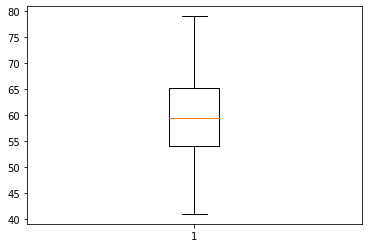

In [73]:
plt.boxplot(score)
plt.show()
# 이상치 제거 확인

Q4. 아래 scores_df에 대해서 아래사항을 수행하세요 2
- scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력
- scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력
- 두개 변수의 상관관계와 회귀직선을 시각화(회귀직선 포함 및 미포함 비교하여 1행 2열로 출력) 
- 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)

In [111]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [125]:
np.cov(df.english,df.mathematics,ddof = 1)[0,1].round(2)

59.68

In [128]:
np.corrcoef(df.english,df.mathematics)[0,1].round(2)

0.72

C:\Users\kwonhyeokjong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(55.0, 90.0)

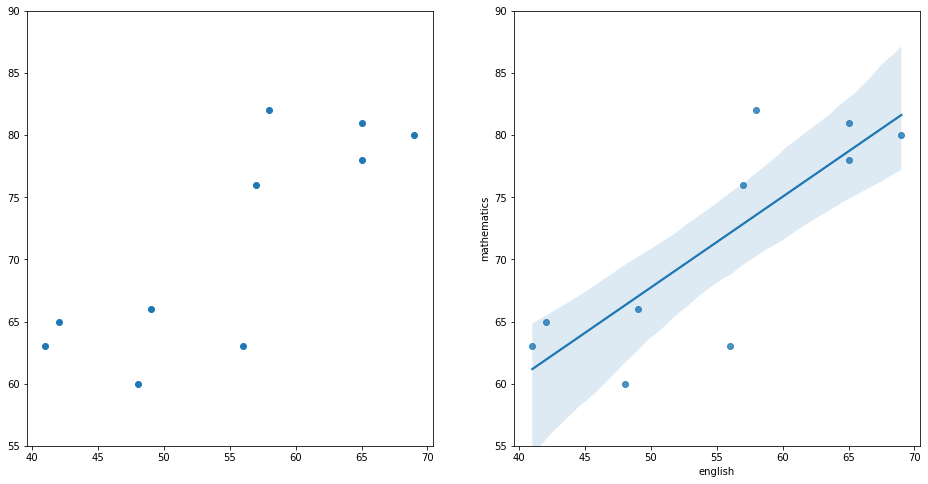

In [151]:
import seaborn as sns
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(scores_df.english,scores_df.mathematics)
ax1.set_ylim(55,90)
sns.regplot(scores_df.english,scores_df.mathematics)
ax2.set_ylim(55,90)

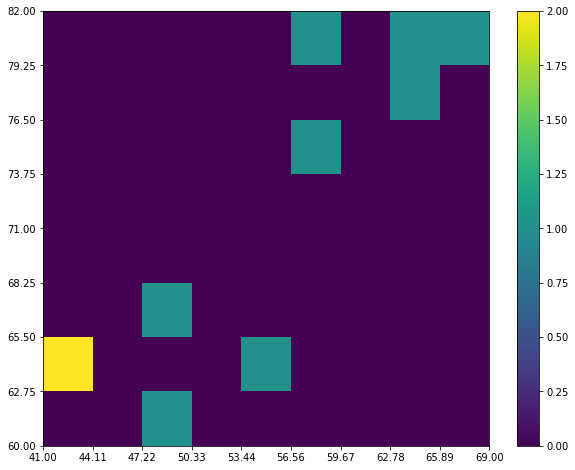

In [164]:
plt.figure(figsize = (10,8))
c = plt.hist2d(scores_df.english,scores_df.mathematics,bins=(9,8))
plt.xticks(c[1])
plt.yticks(c[2])
plt.colorbar(c[3])

Q5. 아래 scores는 전교생의 시험점수이다. 무작위추출로 표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행해서 그 결과를 히스토그램으로 그려 표본평균이 어떻게 분포되는지 시각화를 수행하세요. 5

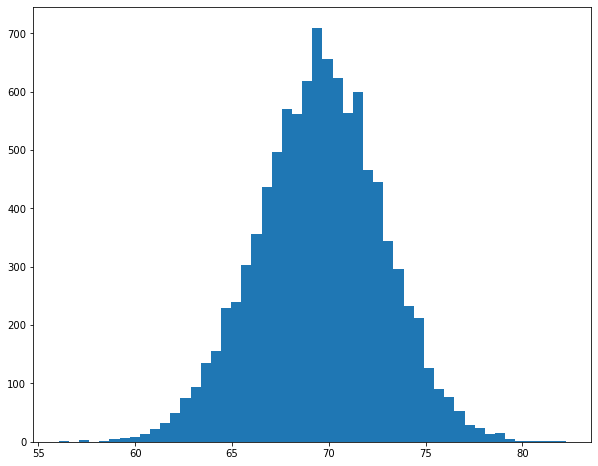

In [94]:
df = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]
samples = np.random.choice(scores,(20,10000))
samples_mean = samples.mean(axis =0)
plt.figure(figsize=(10,8))
plt.hist(samples_mean,bins=50)
plt.show()

Q6. Bern(0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요. 5

In [97]:
from scipy import stats
rv = stats.bernoulli(0.5)
print('기댓값 : ',rv.mean())
print('분산 : ',rv.var())

기댓값 :  0.5
분산 :  0.25


Q7. Bin(10,0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요. 5

In [100]:
rv = stats.binom(10,0.5)
print('기댓값 : ',rv.mean())
print('분산 : ',rv.var())

기댓값 :  5.0
분산 :  2.5


Q8. Poi(2)을 따른 확률변수 X에 대하여 기댓값과 분산을 계산하세요. 5

In [102]:
rv = stats.poisson(2)
print('기댓값 : ',rv.mean())
print('분산 : ',rv.var())

기댓값 :  2.0
분산 :  2.0


Q9. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현하세요. 5

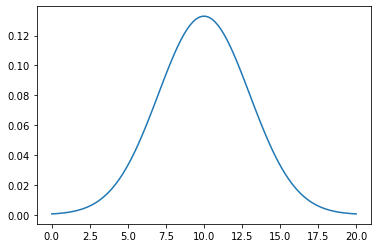

In [105]:
rv = stats.norm(10,3)
x_s = np.linspace(0,20,100)
plt.plot(x_s,rv.pdf(x_s))

Q10. 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현하세요. 5

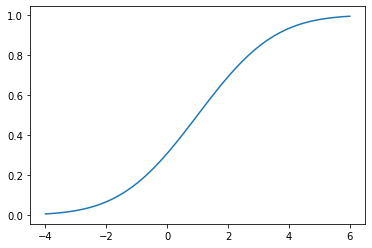

In [108]:
rv = stats.norm(1,2)
x_s = np.linspace(-4,6,100)
plt.plot(x_s,rv.cdf(x_s))

Q11. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요. 5
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [258]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("./data/5_2_fm.csv")
df1

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [259]:
df2 = df1.copy()
df2.loc[df2.species=='A','species']='C'
df2.loc[df2.species=='B','species']='D'
df2.head()

,species,length
0,C,2
1,C,3
2,C,4
3,D,6
4,D,8


In [260]:
df2.loc[df2.species=='C','length'] *= 2
df2.loc[df2.species=='D','length'] *= 3
df = pd.concat([df1,df2])
df

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10
0,C,4
1,C,6
2,C,8
3,D,18


In [263]:
df.pivot_table(values='length',aggfunc=['mean','std'], index= 'species')

,mean,std
,length,length
species,,
A,3,1
B,8,2
C,6,2
D,24,6


Q12. "./dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요. 5
- 4행 3열을 복사 후 추가하여 8행 3열로 작성
- 피봇을 이용해서 교차분석표 작성(values='sales',aggfunc='sum', index= 'store', columns = 'color')
- 독립성 검정을 수행(보너스 문제)

In [249]:
import pandas as pd
shoes = pd.read_csv("./data/5_2_shoes.csv")
shoes1=shoes.copy()
shoes1

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [257]:
shoes2=shoes.copy()
df = pd.concat([shoes1,shoes2])
df

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [256]:
df.pivot_table(values='sales',aggfunc='sum', index= 'store', columns = 'color')

color,blue,red
store,,
osaka,26,18
tokyo,20,30


Q13. 'dataset/titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요 5

In [266]:
titanic = pd.read_csv('data/titanic3.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [293]:
df = titanic.pivot_table(index = 'pclass',columns = 'sex', values = 'survived', aggfunc = 'mean')
df

sex,female,male
pclass,,
1,0.965278,0.340782
2,0.886792,0.146199
3,0.490741,0.152130


<AxesSubplot:xlabel='sex', ylabel='pclass'>

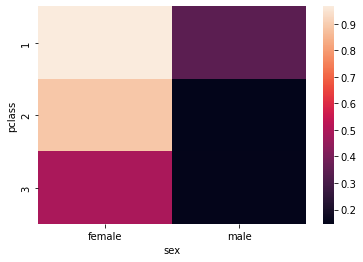

In [291]:
sns.heatmap(df)
# 클래스가 낮을수록 생존률이 높고 남성보다 여성의 생존률이 높다

Q14. 평균 4, 표준편차 0.8인 정규분포에서 샘플사이즈 10인 표본 10000개의 표본평균을 배열로 저장하고 10개를 출력하세요.(넘파이 zeros 함수 이용) 5

In [324]:
rv = stats.norm(4,0.8)
samples = np.zeros((10,10000))
samples
samples = rv.rvs((10,10000))
samples_mean = samples.mean(axis = 0)
samples_mean[:10]

array([3.92443989, 3.93172273, 4.07606378, 4.37679756, 3.99980604,
       3.84308203, 3.85085489, 4.35082909, 4.16252934, 3.87273823])

Q15. Q14에서 구한 배열의 히스토그램을 시각화하세요.(확률밀도 포함) 2.5

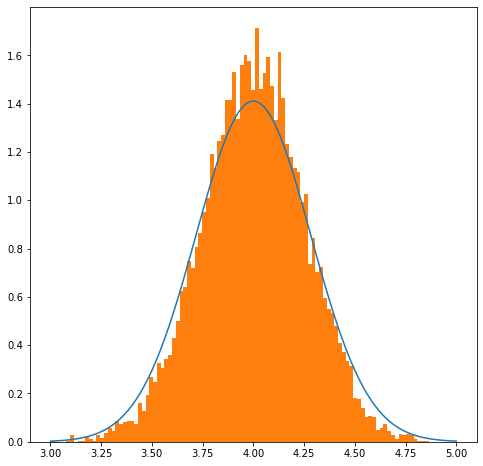

In [347]:
plt.figure(figsize = (8,8))
rv2 = stats.norm(4,np.sqrt(0.8/10))
x_s = np.linspace(3,5,100)
plt.plot(x_s,rv2.pdf(x_s))
plt.hist(samples_mean,bins = 100,density=True)
plt.show()

Q16. 서로 독립인 X\~N(1,2), Y\~N(2,3)이 있을 때 확률변수 X + Y의 분포는 N(3,5)를 따른다는 것을 시각화하여 출력하세요. 5

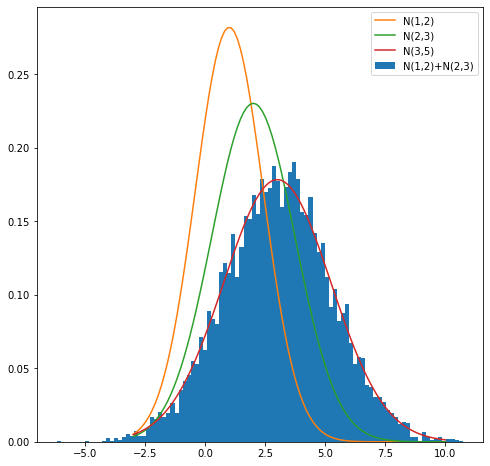

In [362]:
plt.figure(figsize = (8,8))
rv1 = stats.norm(1,np.sqrt(2))
rv2 = stats.norm(2,np.sqrt(3))
rv_s = stats.norm(3,np.sqrt(5))
sample1 = rv1.rvs(10000)
sample2 = rv2.rvs(10000)
sum_sample = sample1 + sample2
plt.hist(sum_sample,bins = 100, density = True,label = 'N(1,2)+N(2,3)')
x_s = np.linspace(-3,10,100)
plt.plot(x_s, rv1.pdf(x_s),label = 'N(1,2)')
plt.plot(x_s, rv2.pdf(x_s),label = 'N(2,3)')
plt.plot(x_s, rv_s.pdf(x_s),label = 'N(3,5)')
plt.legend()
plt.show()

Q17. 서로 독립인 X ~ Poi(3)과 Y ~ Poi(4)가 있을 때 확률변수 X + Y도 포아송 분포를 따른다는 것을 시각화하여 출력하세요. 5

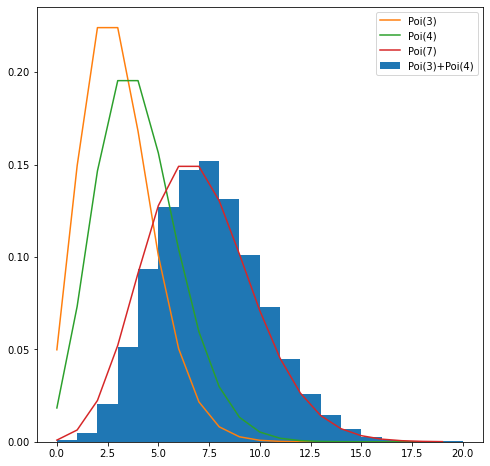

In [376]:
plt.figure(figsize = (8,8))
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)
rv_s = stats.poisson(7)
sample1 = rv1.rvs(10000)
sample2 = rv2.rvs(10000)
sum_sample = sample1 + sample2
x_s = np.arange(20)
plt.hist(sum_sample,bins=20, density = True,label = 'Poi(3)+Poi(4)')
plt.plot(x_s, rv1.pmf(x_s),label = 'Poi(3)')
plt.plot(x_s, rv2.pmf(x_s),label = 'Poi(4)')
plt.plot(x_s, rv_s.pmf(x_s),label = 'Poi(7)')
plt.legend()
plt.show()

Q18. 베르누이 분포의 합은 이항분포가 되는 성질을 시각화하여 출력하세요  5

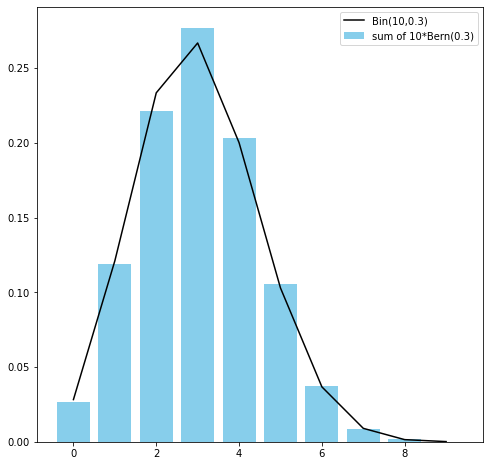

In [387]:
plt.figure(figsize = (8,8))
rv1 = stats.bernoulli(0.3)
rv_s = stats.binom(10,0.3)
sample1 = rv1.rvs((10,10000))
sum_sample = sample1.sum(axis=0)
x_s = np.arange(10)
hist , _ = np.histogram(sum_sample,bins=10,range=(0,10), density = True)
plt.bar(x_s,hist,color = 'skyblue',label = 'sum of 10*Bern(0.3)')
plt.plot(x_s, rv_s.pmf(x_s),color = 'black',label = 'Bin(10,0.3)')
plt.legend()
plt.show()

Q19. 포아송 분포의 표본분포는 근사적으로 정규분포를 따른다는 것을 시각화하고 그 핵심 근거인 중심극한정리에 대하여 설명하세요. 5

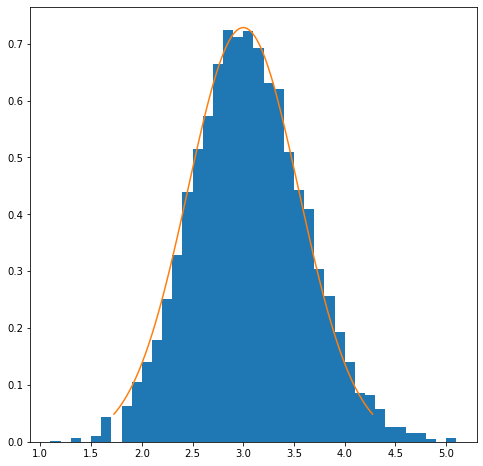

In [414]:
l = 3
n = 10

rv = stats.poisson(l)
rv_n = stats.norm(l,np.sqrt(l/n))

sample_size = int(10000)
X_sample = rv.rvs((n,sample_size))
sample_mean = np.mean(X_sample,axis = 0)
plt.figure(figsize=(8,8))
plt.hist(sample_mean,bins=40,density=True)
x_s = np.linspace(rv_n.isf(0.99),rv_n.isf(0.01),100)
plt.plot(x_s,rv_n.pdf(x_s))
plt.show()
# 중심극한정리는 확률변수들이 서로 돌릭이고 기댓값이 mu , 분산이 sigma^2 인 환률분포를 따를 때 확률변수의 갯수 n이 커짐에 따라 표본
# 평균의 분포는 정규분포 N(mu,sigma^2/n)에 가까워진다는 정리이다.

Q20. 아래 df 데이터셋에서 "무게의 평균이 130kg이다."라는 귀무가설에 대한 유의성 검정을 수행하세요. 5

In [412]:
df = pd.read_csv('./data/ch11_potato.csv')
print(df.head(),len(df))

       무게
0  122.02
1  131.73
2  130.60
3  131.82
4  132.05 14


In [416]:
sample = np.array(df.무게)
sample

array([122.02, 131.73, 130.6 , 131.82, 132.05, 126.12, 124.43, 132.89,
       122.79, 129.95, 126.14, 134.45, 127.64, 125.68])

In [422]:
# sample 은 14번 사온 무게들
# 유의 수준을 5%로 설정
# 귀무가설은 '무게의 평균이 130g이다'
# 대립가설은 '무게의 평균이 130g보다 작다'
print('표본평균 : ',sample.mean())
# 임계값 계산
rv = stats.norm(130,np.sqrt(9/14))
print('임계값 : ',rv.isf(0.95),'\n')
# 표본평균이 임계값보다 작으므로 귀무가설은 기각된다.
# 따라서 모평균은 130g보다 작다.

표본평균 :  128.4507142857143
임계값 :  128.68118313069039 

